Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
--- 1. Confirming Sample Counts per Group ---
Dilated cardiomyopathy (DCM)    165
Non-Failing Donor               162
dtype: int64
--- 2. Performing PCA and Checking for Batch Effects ---
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensio

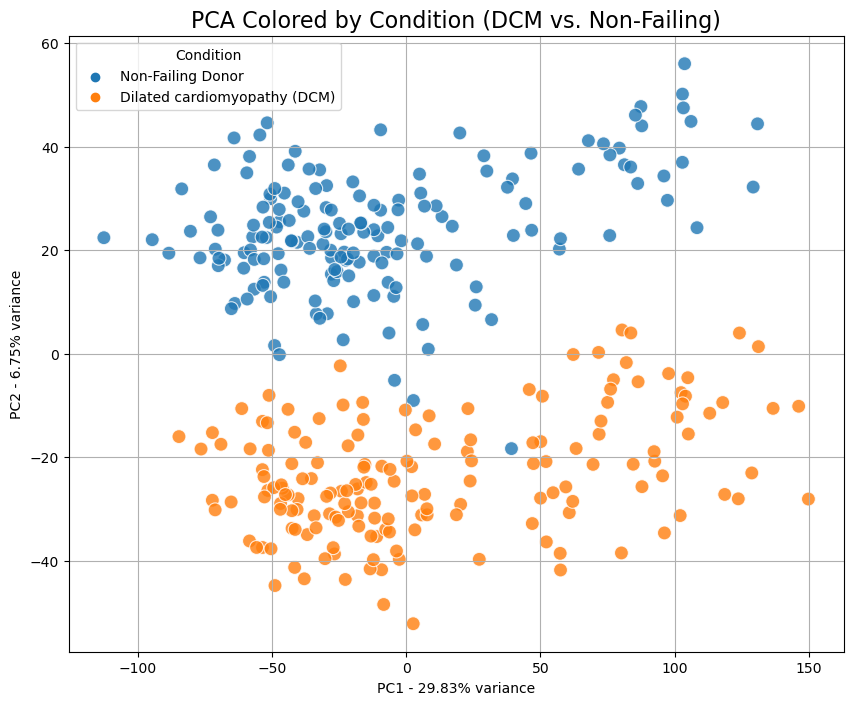

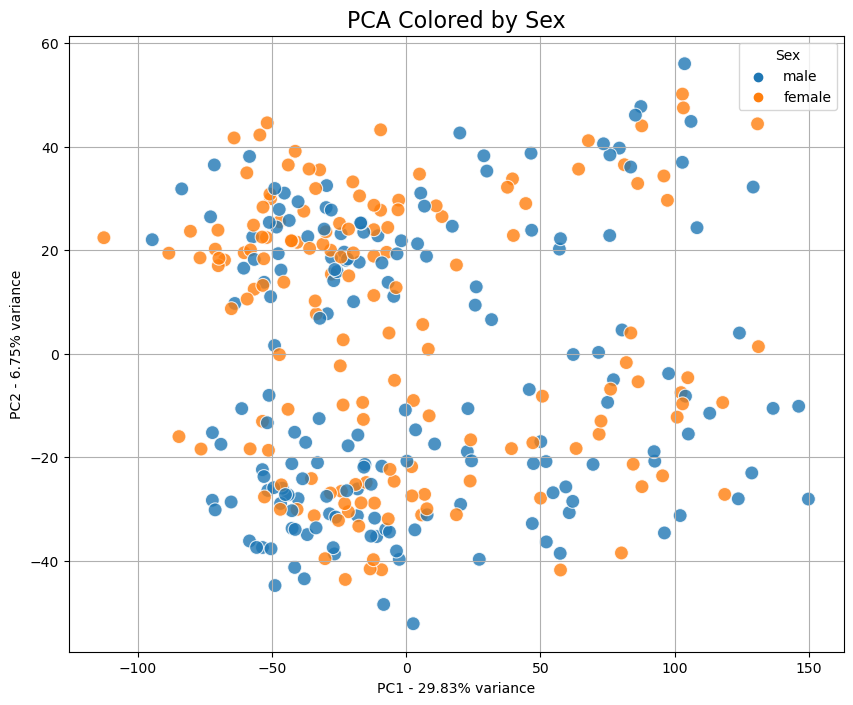

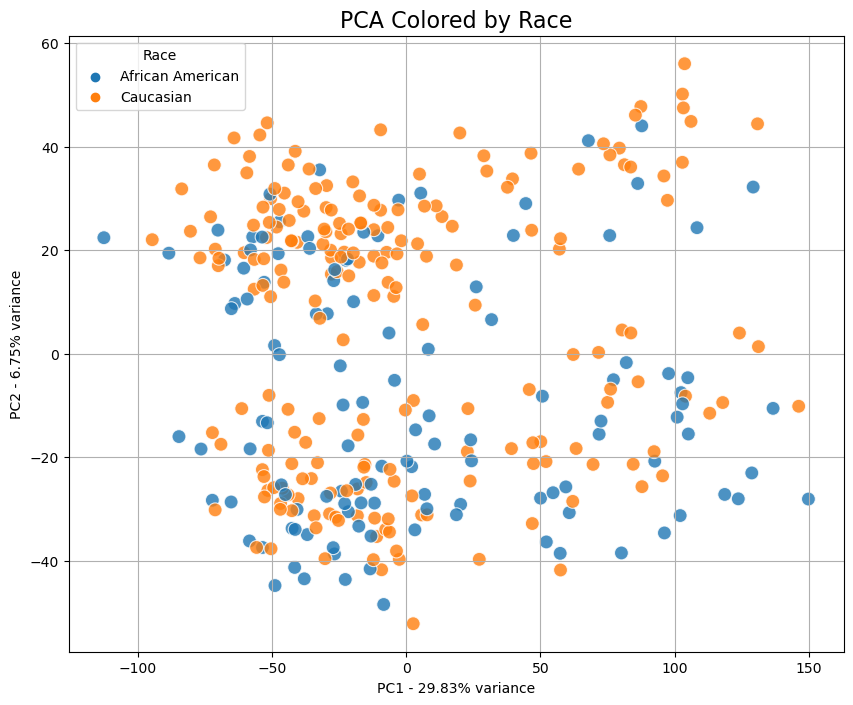

--- 3. Inspecting Top Genes Driving Principal Components ---
Top 10 genes driving PC1:
                      PC1       PC2
ENSG00000241978 -0.039272 -0.006430
ENSG00000058673 -0.038796 -0.005883
ENSG00000281649 -0.029869 -0.009661
ENSG00000152082  0.028455  0.002390
ENSG00000188536  0.027821 -0.040571
ENSG00000177311 -0.027714 -0.007971
ENSG00000231811 -0.027588 -0.009213
ENSG00000280987 -0.027096  0.009538
ENSG00000099624  0.026996  0.000226
ENSG00000206172  0.026952 -0.039452
Top 10 genes driving PC2:
                      PC1       PC2
ENSG00000115602 -0.010411  0.071669
ENSG00000075886  0.004830  0.059492
ENSG00000106483  0.005914 -0.058946
ENSG00000152086  0.005420  0.058774
ENSG00000196136 -0.001009  0.058229
ENSG00000267206  0.004677  0.053797
ENSG00000187922  0.002926  0.053317
ENSG00000101825  0.000260 -0.049784
ENSG00000142973 -0.003594  0.049212
ENSG00000273259 -0.000361  0.048701


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
normalized_counts_path = '../data/normalized_gene_counts.csv'
normalized_df = pd.read_csv(normalized_counts_path, index_col=0)
X = normalized_df.T

metadata_path = '../data/MAGE_metadata.txt'
metadata_df = pd.read_csv(metadata_path)

# --- Prepare Data for Plotting ---
filtered_metadata = metadata_df[metadata_df['Run'].isin(X.index)]
etiology_map = filtered_metadata.set_index('Run')['etiology']
sex_map = filtered_metadata.set_index('Run')['sex']
race_map = filtered_metadata.set_index('Run')['race']

print("--- 1. Confirming Sample Counts per Group ---")
condition_counts = X.index.map(etiology_map).value_counts()
print(condition_counts)

print("--- 2. Performing PCA and Checking for Batch Effects ---")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=X.index)
pc_df['Condition'] = X.index.map(etiology_map)
pc_df['Sex'] = X.index.map(sex_map)
pc_df['Race'] = X.index.map(race_map)

# Plot PCA colored by Condition
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pc_df, s=100, alpha=0.8)
plt.title('PCA Colored by Condition (DCM vs. Non-Failing)', fontsize=16)
plt.xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% variance')
plt.ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% variance')
plt.legend(title='Condition')
plt.grid(True)
plt.show()

# Plot PCA colored by Sex
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Sex', data=pc_df, s=100, alpha=0.8)
plt.title('PCA Colored by Sex', fontsize=16)
plt.xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% variance')
plt.ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% variance')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

# Plot PCA colored by Race
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Race', data=pc_df, s=100, alpha=0.8)
plt.title('PCA Colored by Race', fontsize=16)
plt.xlabel(f'PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% variance')
plt.ylabel(f'PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% variance')
plt.legend(title='Race')
plt.grid(True)
plt.show()

print("--- 3. Inspecting Top Genes Driving Principal Components ---")
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

top_10_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False).head(10)
print('Top 10 genes driving PC1:')
print(loadings_df.loc[top_10_pc1.index])

top_10_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False).head(10)
print('Top 10 genes driving PC2:')
print(loadings_df.loc[top_10_pc2.index])